In [553]:
import json
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



In [199]:
df = pd.read_csv('kc_house_data.csv')


In [17]:
# del df['waterfront']

In [18]:
# del df['date']

In [20]:
# del df['yr_renovated']

In [22]:
# del df['view']

In [24]:
# del df['lat']

In [26]:
# del df['long']

In [39]:
# del df['zipcode']

In [41]:
# del df['id']

In [8]:
# df.fillna(0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [200]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [506]:
import statsmodels.api as sm
X = df["condition"]
y = df["price"]
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.666
Model:                            OLS   Adj. R-squared (uncentered):              0.666
Method:                 Least Squares   F-statistic:                          4.307e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):                        0.00
Time:                        12:09:09   Log-Likelihood:                     -3.0798e+05
No. Observations:               21597   AIC:                                  6.160e+05
Df Residuals:                   21596   BIC:                                  6.160e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
condition   1.536e+05    740.156    207.528      0.000    1.52e+05    1.55e+05
==============================================================================
Omnibus:                    17895.587   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           916710.041
Skew:                           3.665   Prob(JB):                         0.00
Kurtosis:                      34.064   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
df = df.drop(['id', 'lat', 'long', 'yr_renovated', 'sqft_basement'], axis=1)

In [202]:
df = df.fillna(0)

In [203]:
df['date'] = pd.to_datetime(df['date'])

In [204]:
df['date'] = [i.month for i in df['date']]

In [383]:
df['PRICE'] = df['price'].map(lambda x: np.log(x))

In [384]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing,PRICE
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340,5650,60,12.309982
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690,7639,64,13.195614
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720,8062,82,12.100712
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360,5000,50,13.311329
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800,7503,28,13.142166
5,5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,4760,101930,14,14.022525
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,2238,6819,20,12.458775
7,1,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,1963,98198,1650,9711,52,12.583995
8,4,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,1780,8113,55,12.343658
9,3,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,2390,7570,12,12.685408


In [344]:
df_dummies = pd.get_dummies(df, prefix = 'zipcode_', columns = ['zipcode'])

In [348]:
df_pred = df.iloc[:,0:17]
df_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340,5650,60
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690,7639,64
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720,8062,82
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360,5000,50
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800,7503,28


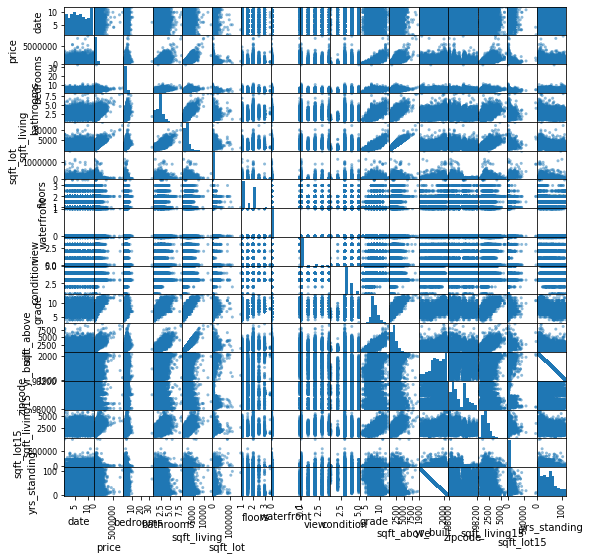

In [349]:
pd.plotting.scatter_matrix(df_pred,figsize  = [9, 9]);
plt.show()

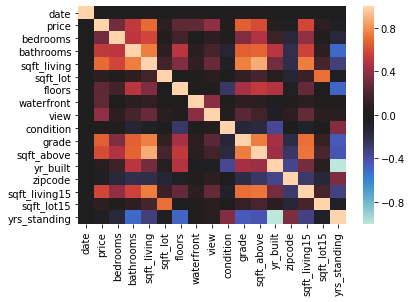

In [350]:
sns.heatmap(df_pred.corr(), center=0);

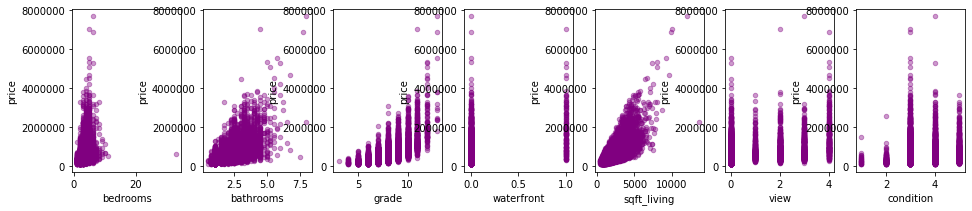

In [508]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'grade', 'waterfront', 'sqft_living', 'view', 'condition'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='purple')

In [207]:
df[['waterfront']].nunique()

waterfront    2
dtype: int64

In [208]:
yr_built = list(df['yr_built'])


In [209]:
yr_dif_built = []
for i in yr_built:
    x = 2015 - i
    yr_dif_built.append(x)

In [210]:
m = np.array(yr_dif_built)
yr_dff_built = pd.DataFrame(m)


In [211]:
df['yrs_standing'] = yr_dff_built

In [309]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [318]:
poly = PolynomialFeatures(2)
X_fin = poly.fit_transform(X_train)
X_fin_test = poly.transform(X_test)

In [319]:
reg = linear_model.LinearRegression().fit(X_fin, y_train)

In [320]:
y_pred = reg.predict(X_fin_test)

In [321]:
print(r2_score(y_test, y_pred))

0.7113500204100776


In [351]:
y = df_dummies[["price"]]
X = df_dummies

scale = StandardScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = X.columns)

In [66]:
X = X.fillna(0)

In [352]:


# Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [353]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[[-6.29274178e-11  3.67359635e+05  2.03726813e-10 -3.78349796e-10
  -1.45519152e-11 -1.16415322e-10 -1.58706825e-10  1.67347025e-10
  -3.49245965e-10  6.18456397e-11 -2.21916707e-10 -2.40106601e-10
  -1.09139364e-10 -3.05590220e-10 -1.60071068e-10  1.45519152e-10
   6.36646291e-11 -3.36513040e-11 -9.09494702e-13  5.09317033e-11
  -4.36557457e-11 -3.27418093e-11 -2.27373675e-11  2.72848411e-11
  -2.18278728e-11  5.09317033e-11 -2.91038305e-11 -2.54658516e-11
  -6.54836185e-11 -3.27418093e-11 -4.91127139e-11 -6.18456397e-11
   2.91038305e-11 -4.00177669e-11 -3.27418093e-11 -1.04591891e-11
   1.81898940e-11  0.00000000e+00  2.18278728e-11 -5.82076609e-11
  -1.63709046e-11 -3.45607987e-11 -8.36735126e-11 -1.81898940e-11
  -2.54658516e-11 -6.27551344e-11 -9.09494702e-13 -3.63797881e-11
   3.63797881e-12 -6.82121026e-11 -4.18367563e-11 -8.00355338e-11
  -3.41060513e-12 -3.18323146e-11 -5.09317033e-11 -5.45696821e-11
  -3.27418093e-11 -2.18278728

In [354]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[-1.74665915e+00  3.67299138e+05 -2.21637234e+01  6.97609406e+00
  4.74558781e+01 -7.89425812e+00  6.49973624e+00  1.08041963e+01
  2.53072800e+00  7.75388091e-01  5.03946304e+00 -1.48482993e+00
 -6.98368074e+00 -0.00000000e+00  3.42230720e+00  1.21646481e+00
 -3.07109969e+00 -1.76166874e+00 -3.07731697e+00  1.07636245e+01
  1.06870622e+00  1.22322388e+00  8.21596839e-01  1.67263982e+00
 -7.31382823e-01 -7.37115416e-01 -4.92046186e-01 -1.36889729e+00
 -1.69499037e+00 -4.58989152e+00 -0.00000000e+00 -9.33390752e-01
 -8.21749190e-01 -0.00000000e+00 -2.34187583e+00 -2.25156760e+00
 -1.12808650e+00  3.64936951e+00  4.31486932e-01 -3.81939825e+00
  7.71660667e+00  5.47005681e+00 -3.39526614e+00 -4.42650292e-01
  8.64178638e-01 -1.84511690e-01 -1.91151353e+00 -1.20149478e+00
 -2.16713649e+00 -1.25364516e+00 -2.23229146e+00 -1.61095161e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -2.51125294e-01
 -3.36291212e+00  2.28174687e+00  2.24996803e+00  3.7104

In [355]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[[-1.32257475e+00  3.67304051e+05 -3.81746397e+00  3.54105323e+00
   1.74532393e+01  1.74928065e+00 -3.68525968e+00  9.10788044e+00
   6.64611278e+00  2.24517408e+00  1.03134561e+01  9.98867505e+00
  -1.93966121e+00  9.46815345e-01 -4.12149407e-01  1.93966132e+00
  -3.56098456e+00 -2.29059680e+00 -3.55112188e+00  1.06773724e+01
   1.26948799e+00  1.77157611e+00  7.06999982e-01  1.08780713e+00
  -1.21171143e+00 -9.28335227e-01 -1.07646608e+00 -1.35021402e+00
  -3.19616386e+00 -5.02730351e+00 -3.75769331e-01 -4.79213349e-01
  -1.16831379e+00  4.66087375e-01 -2.93674199e+00 -2.87073333e+00
  -2.00460450e+00  3.94432907e+00  3.13820277e-01 -3.84739787e+00
   7.93978979e+00  5.55587840e+00 -4.24220202e+00 -1.49441296e+00
   9.85992476e-01 -2.35287356e-02 -2.32769044e+00 -1.94512298e+00
  -3.35040792e+00 -2.16985628e+00 -1.93892671e+00 -2.35927781e+00
  -6.17352115e-01 -3.75184627e-01 -4.53848568e-01 -1.04042521e+00
  -4.27162569e+00  3.48845114e+00  3.80351

In [356]:
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(17277,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(4320,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [357]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model price    1.020740e+07
dtype: float64
Test Error Ridge Model price    2.640868e+06
dtype: float64


Train Error Lasso Model price    1.816377e+07
dtype: float64
Test Error Lasso Model price    4.431217e+06
dtype: float64


Train Error Unpenalized Linear Model price    1.022324e-13
dtype: float64
Test Error Unpenalized Linear Model price    2.408712e-14
dtype: float64


In [369]:




housing_predictors = df.iloc[:,:17]
corr = housing_predictors.corr()



In [370]:
housing_predictors.iloc[:,:15]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15
0,10,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,1340
1,12,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,1690
2,2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,2720
3,12,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,1360
4,2,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,1800
5,5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,2001,98053,4760
6,6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,1995,98003,2238
7,1,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,1060,1963,98198,1650
8,4,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,1960,98146,1780
9,3,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,2003,98038,2390


In [371]:
corr

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing
date,1.000000,-0.009928,-0.001046,0.007543,0.012112,-0.002591,0.014245,0.008199,-0.005161,0.022388,0.008989,0.010153,-0.006235,-0.000143,0.002513,0.003189,0.006235
price,-0.009928,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.053953,-0.053402,0.585241,0.082845,-0.053953
bedrooms,-0.001046,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.155670,-0.154092,0.393406,0.030690,-0.155670
bathrooms,0.007543,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.507173,-0.204786,0.569884,0.088303,-0.507173
sqft_living,0.012112,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.318152,-0.199802,0.756402,0.184342,-0.318152
sqft_lot,-0.002591,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.052946,-0.129586,0.144763,0.718204,-0.052946
floors,0.014245,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,0.489193,-0.059541,0.280102,-0.010722,-0.489193
waterfront,0.008199,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,-0.024487,0.028923,0.083823,0.030658,0.024487
view,-0.005161,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,-0.054452,0.085059,0.278928,0.073083,0.054452
condition,0.022388,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,-0.361592,0.002888,-0.093072,-0.003126,0.361592


In [372]:
corr[abs(housing_predictors.corr() > 0.75)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing
date,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,0.762779,0.876448,NaN,NaN,0.756402,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


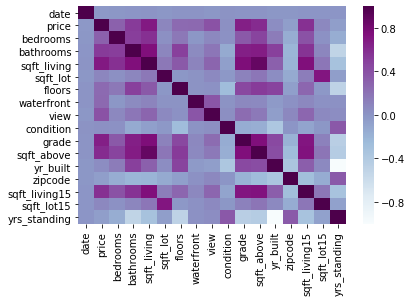

In [373]:
sns.heatmap(corr, cmap = "BuPu")


In [510]:
dumm_corr = df_dummies.corr()

In [513]:
dumm_corr[abs(df_dummies.corr() > 0.75)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode__98146,zipcode__98148,zipcode__98155,zipcode__98166,zipcode__98168,zipcode__98177,zipcode__98178,zipcode__98188,zipcode__98198,zipcode__98199
date,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathrooms,NaN,NaN,NaN,1.000000,0.755758,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_living,NaN,NaN,NaN,0.755758,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sqft_lot,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
floors,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [386]:
df_dum = df_dummies.drop('price', axis=1)

In [522]:
df_ddum = df_dum.drop(['date','view', 'sqft_lot', 'floors', 'condition', 'waterfront', 'yr_built'], axis=1)

In [523]:
df_ddum

,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_living15,sqft_lot15,yrs_standing,zipcode__98001,zipcode__98002,...,zipcode__98146,zipcode__98148,zipcode__98155,zipcode__98166,zipcode__98168,zipcode__98177,zipcode__98178,zipcode__98188,zipcode__98198,zipcode__98199
0,3,1.00,1180,7,1180,1340,5650,60,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7,2170,1690,7639,64,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,6,770,2720,8062,82,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,7,1050,1360,5000,50,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8,1680,1800,7503,28,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,4.50,5420,11,3890,4760,101930,14,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,2.25,1715,7,1715,2238,6819,20,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1.50,1060,7,1060,1650,9711,52,0,0,...,0,0,0,0,0,0,0,0,1,0
8,3,1.00,1780,7,1050,1780,8113,55,0,0,...,1,0,0,0,0,0,0,0,0,0
9,3,2.50,1890,7,1890,2390,7570,12,0,0,...,0,0,0,0,0,0,0,0,0,0


In [502]:
from sklearn import linear_model
import statsmodels.api as sm
import pandas as pd



X = df_dum # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['PRICE']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()

model.summary()

Intercept: 
 748832377.9759107
Coefficients: 
 [-4.88264077e-03  2.45223721e-03  4.47911311e-02  1.25554765e-04
  5.93142910e-07 -2.74832950e-02  4.68784765e-01  6.01289659e-02
  5.39101463e-02  9.48643665e-02  7.11265627e-05 -3.71628963e+05
  8.31028947e-05  5.85284110e-08 -3.71628962e+05 -6.44304402e+00
 -6.47850657e+00 -6.43614763e+00 -5.35880595e+00 -5.72840567e+00
 -5.83842285e+00 -5.80835792e+00 -5.80896531e+00 -6.19779142e+00
 -5.99808024e+00 -6.14453892e+00 -6.11667249e+00 -6.40422385e+00
 -6.48146497e+00 -6.03250211e+00 -5.94995682e+00 -6.03172878e+00
 -5.85760279e+00 -6.39375580e+00 -6.37584327e+00 -6.48257017e+00
 -5.67524154e+00 -5.91202671e+00 -6.27476057e+00 -5.23317927e+00
 -5.60470147e+00 -6.38855413e+00 -6.11737726e+00 -5.81822729e+00
 -5.87178785e+00 -6.31534999e+00 -6.13846219e+00 -6.28852515e+00
 -6.11789679e+00 -6.05802892e+00 -6.11207360e+00 -5.96102053e+00
 -5.90295845e+00 -5.91111009e+00 -6.01351033e+00 -6.42304513e+00
 -5.52643660e+00 -5.65173916e+00 -5.5317854

/Users/Finch/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1840.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:44:07   Log-Likelihood:                 5793.8
No. Observations:               21597   AIC:                        -1.142e+04
Df Residuals:                   21513   BIC:                        -1.075e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.001e-06   3.26e-08    183.907      0.000    5.94e-06    6.07e-06
date              -0.0049      0.000    -12.021      0.000      -0.006      -0.004
bedrooms           0.0025      0.002      1.382      0.167      -0.001       0.006
bathrooms          0.0448      0.003     14.880      0.000       0.039       0.051
sqft_living        0.0001    4.1e-06     30.633      0.000       0.000       0.000
sqft_lot        5.931e-07   4.43e-08     13.385      0.000    5.06e-07     6.8e-07
floors            -0.0275      0.004     -7.556      0.000      -0.035      -0.020
waterfront         0.4688      0.017     27.659      0.000       0.436       0.502
view               0.0601      0.002     29.972      0.000       0.056       0.064
condition          0.0539      0.002     24.660      0.000       0.050       0.058
grade              0.0949      0.002     45.153      0.000       0.091       0.099
sqft_above      7.113e-05   4.19e-06     16.978      0.000    6.29e-05    7.93e-05
yr_built           0.0057   8.45e-06    675.395      0.000       0.006       0.006
sqft_living15    8.31e-05   3.33e-06     24.968      0.000    7.66e-05    8.96e-05
sqft_lot15      5.853e-08   6.97e-08      0.840      0.401   -7.81e-08    1.95e-07
yrs_standing       0.0064   6.79e-05     94.027      0.000       0.006       0.007
zipcode__98001    -0.4548      0.010    -46.406      0.000      -0.474      -0.436
zipcode__98002    -0.4903      0.013    -37.260      0.000      -0.516      -0.465
zipcode__98003    -0.4479      0.011    -40.501      0.000      -0.470      -0.426
zipcode__98004     0.6294      0.011     59.697      0.000       0.609       0.650
zipcode__98005     0.2598      0.014     18.146      0.000       0.232       0.288
zipcode__98006     0.1498      0.009     17.412      0.000       0.133       0.167
zipcode__98007     0.1798      0.016     11.597      0.000       0.149       0.210
zipcode__98008     0.1792      0.011     16.238      0.000       0.158       0.201
zipcode__98010    -0.2096      0.018    -11.347      0.000      -0.246      -0.173
zipcode__98011    -0.0099      0.013     -0.747      0.455      -0.036       0.016
zipcode__98014    -0.1563      0.017     -9.259      0.000      -0.189      -0.123
zipcode__98019    -0.1285      0.013     -9.518      0.000      -0.155      -0.102
zipcode__98022    -0.4160      0.012    -33.619      0.000      -0.440      -0.392
zipcode__98023    -0.4933      0.008    -58.898      0.000      -0.510      -0.477
zipcode__98024    -0.0443      0.021     -2.130      0.033      -0.085      -0.004
zipcode__98027     0.0382      0.009      4.142      0.000       0.020       0.056
zipcode__98028    -0.0435      0.011     -3.959      0.000      -0.065      -0.022
zipcode__98029     0.1306      0.010     12.509      0.000       0.110       0.151
zipcode__980

In [555]:



X = df_ddum # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['PRICE']

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(predictions)
model.summary()

Intercept: 
 1183731.2148827754
Coefficients: 
 [-6.17028584e-03  4.90514864e-02  1.70222420e-04  1.04487168e-01
  2.36121551e-05  9.81474046e-05  6.83978210e-07  1.74407270e-03
 -1.18372017e+06 -1.18372019e+06 -1.18372017e+06 -1.18371911e+06
 -1.18371948e+06 -1.18371956e+06 -1.18371955e+06 -1.18371951e+06
 -1.18371992e+06 -1.18371976e+06 -1.18371988e+06 -1.18371987e+06
 -1.18372008e+06 -1.18372022e+06 -1.18371976e+06 -1.18371970e+06
 -1.18371977e+06 -1.18371961e+06 -1.18372013e+06 -1.18372011e+06
 -1.18372021e+06 -1.18371941e+06 -1.18371964e+06 -1.18372001e+06
 -1.18371899e+06 -1.18371931e+06 -1.18372011e+06 -1.18371984e+06
 -1.18371957e+06 -1.18371962e+06 -1.18372006e+06 -1.18371985e+06
 -1.18372002e+06 -1.18371985e+06 -1.18371980e+06 -1.18371970e+06
 -1.18371971e+06 -1.18371966e+06 -1.18371965e+06 -1.18371977e+06
 -1.18372015e+06 -1.18371932e+06 -1.18371942e+06 -1.18371930e+06
 -1.18371988e+06 -1.18371939e+06 -1.18371987e+06 -1.18371926e+06
 -1.18371923e+06 -1.18371941e+06 -1.183719

/Users/Finch/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0        12.415936
1        13.177786
2        12.668746
3        13.140764
4        13.028848
5        14.514899
6        12.462003
7        12.382361
8        12.679149
9        12.665041
10       13.563530
11       13.054271
12       12.816370
13       12.829097
14       13.308174
15       13.440567
16       12.757158
17       13.197097
18       12.295073
19       12.263265
20       12.817699
21       14.032118
22       12.687151
23       12.264019
24       12.761761
25       12.294230
26       13.662061
27       13.487910
28       13.152861
29       13.357841
           ...    
21567    13.056783
21568    12.988622
21569    12.531465
21570    13.196344
21571    12.983645
21572    13.056481
21573    12.895984
21574    14.231741
21575    12.851513
21576    13.084835
21577    13.691079
21578    12.801640
21579    13.193608
21580    13.459387
21581    13.988111
21582    12.952657
21583    13.786323
21584    14.561360
21585    12.938511
21586    12.419817
21587    13.046440
21588    13.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1666.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:10:42   Log-Likelihood:                 4159.6
No. Observations:               21597   AIC:                            -8163.
Df Residuals:                   21519   BIC:                            -7541.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.3264      0.016    720.624      0.000      11.296      11.357
bedrooms          -0.0062      0.002     -3.247      0.001      -0.010      -0.002
bathrooms          0.0491      0.003     15.491      0.000       0.043       0.055
sqft_living        0.0002   4.14e-06     41.104      0.000       0.000       0.000
grade              0.1045      0.002     46.348      0.000       0.100       0.109
sqft_above      2.361e-05   3.88e-06      6.081      0.000     1.6e-05    3.12e-05
sqft_living15   9.815e-05   3.52e-06     27.874      0.000    9.12e-05       0.000
sqft_lot15       6.84e-07   5.69e-08     12.014      0.000    5.72e-07    7.96e-07
yrs_standing       0.0017   6.86e-05     25.435      0.000       0.002       0.002
zipcode__98001    -0.2850      0.011    -27.043      0.000      -0.306      -0.264
zipcode__98002    -0.3035      0.014    -21.456      0.000      -0.331      -0.276
zipcode__98003    -0.2793      0.012    -23.475      0.000      -0.303      -0.256
zipcode__98004     0.7749      0.011     68.265      0.000       0.753       0.797
zipcode__98005     0.4050      0.015     26.312      0.000       0.375       0.435
zipcode__98006     0.3246      0.009     35.072      0.000       0.306       0.343
zipcode__98007     0.3370      0.017     20.160      0.000       0.304       0.370
zipcode__98008     0.3795      0.012     31.998      0.000       0.356       0.403
zipcode__98010    -0.0306      0.020     -1.540      0.124      -0.070       0.008
zipcode__98011     0.1316      0.014      9.238      0.000       0.104       0.159
zipcode__98014     0.0083      0.018      0.457      0.648      -0.027       0.044
zipcode__98019     0.0217      0.015      1.491      0.136      -0.007       0.050
zipcode__98022    -0.1876      0.013    -14.203      0.000      -0.213      -0.162
zipcode__98023    -0.3270      0.009    -36.373      0.000      -0.345      -0.309
zipcode__98024     0.1240      0.022      5.536      0.000       0.080       0.168
zipcode__98027     0.1915      0.010     19.271      0.000       0.172       0.211
zipcode__98028     0.1139      0.012      9.621      0.000       0.091       0.137
zipcode__98029     0.2773      0.011     24.637      0.000       0.255       0.299
zipcode__98030    -0.2403      0.012    -19.263      0.000      -0.265      -0.216
zipcode__98031    -0.2167      0.012    -17.952      0.000      -0.240      -0.193
zipcode__98032    -0.3238      0.018    -18.259      0.000      -0.359      -0.289
zipcode__98033     0.4818      0.010     49.943      0.000       0.463       0.501
zipcode__98034     0.2457      0.009     28.526      0.000       0.229       0.263
zipcode__98038    -0.1239      0.008    -14.632      0.000      -0.141      -0.107
zipcode__98039     0.8951      0.028     31.822      0.000       0.840       0.950
zipcode__980

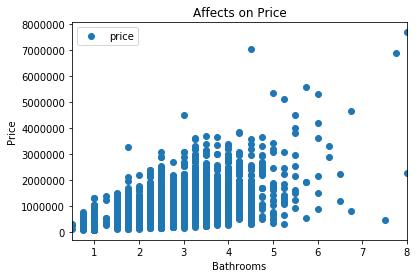

In [542]:
df_dummies.plot(x='bathrooms', y='price', style='o', cmap='Dark2')  
plt.title('Affects on Price')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

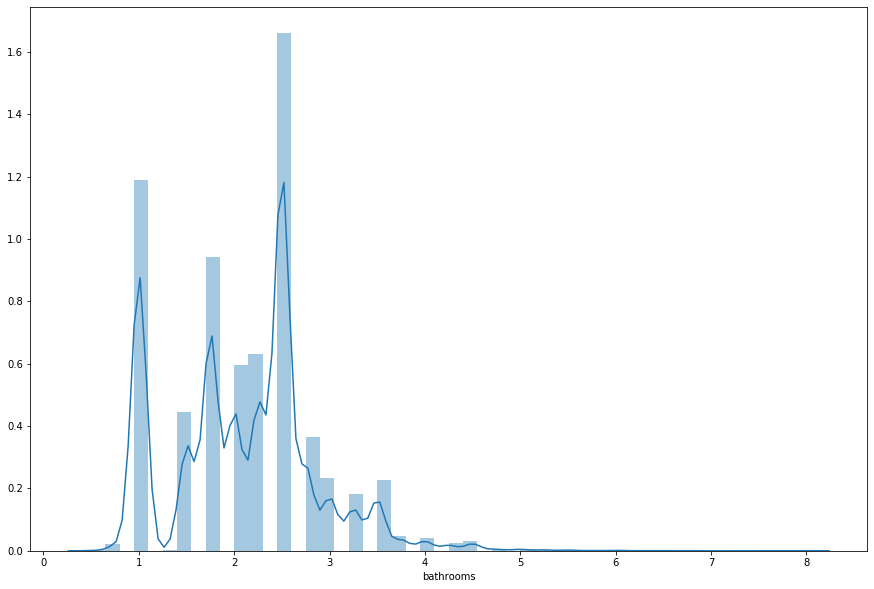

In [543]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_dummies['bathrooms'])

In [544]:
X = df_dummies['price'].values.reshape(-1,1)
y = df_dummies['bathrooms'].values.reshape(-1,1)

In [545]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [546]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [547]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[1.52445635]
[[1.09297744e-06]]


In [548]:
y_pred = regressor.predict(X_test)

In [549]:
prdf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
prdf

,Actual,Predicted
0,3.50,2.234892
1,2.25,2.207567
2,2.50,2.423430
3,1.75,1.721083
4,2.75,1.928858
5,2.50,2.329981
6,2.75,2.087886
7,2.25,1.950718
8,2.50,2.013077
9,2.75,2.453487


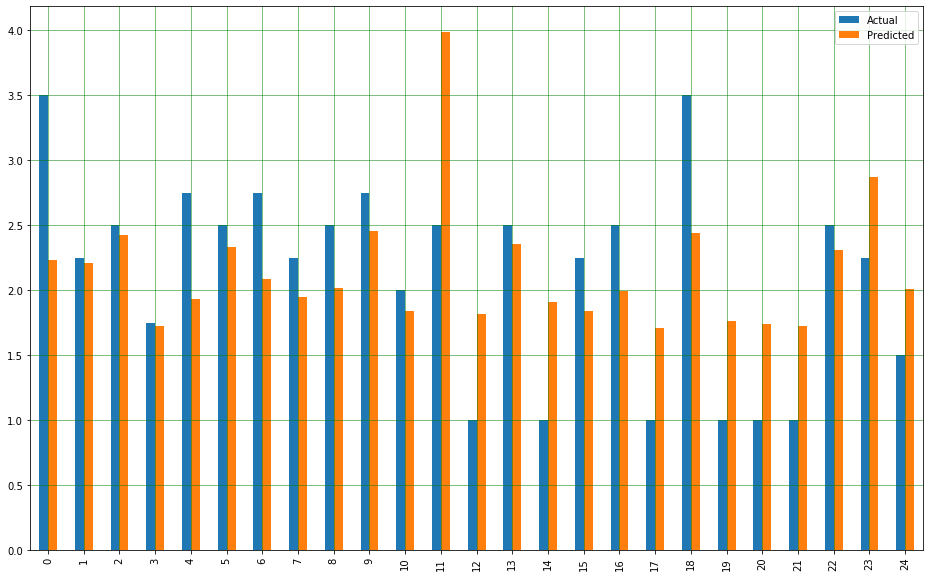

In [550]:
prdf1 = prdf.head(25)
prdf1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

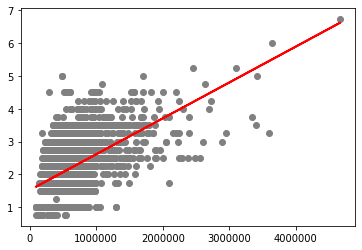

In [551]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [554]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5280734333565535
Mean Squared Error: 0.4166285009554694
Root Mean Squared Error: 0.6454676606581227


In [558]:
X = df_ddum.values # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['PRICE'].values

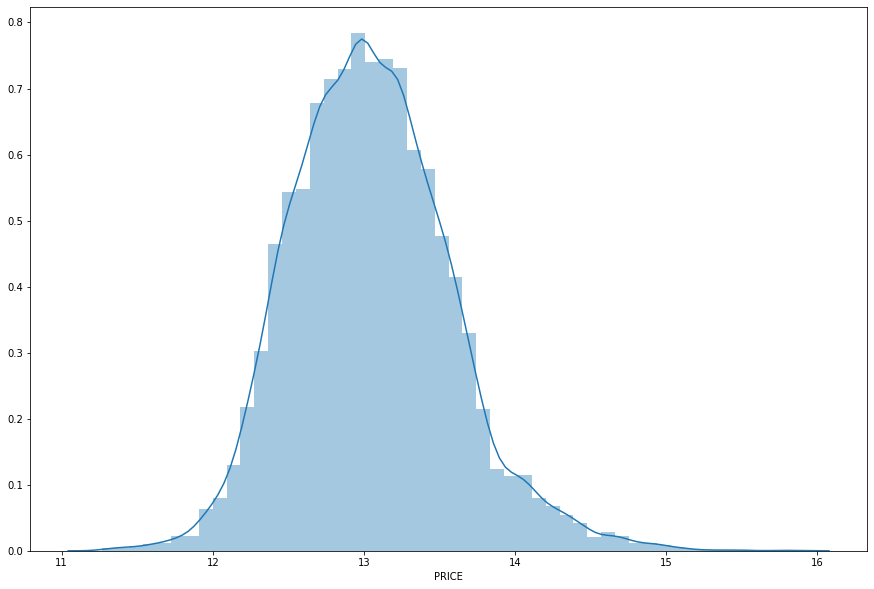

In [560]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['PRICE'])

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [562]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [575]:
y_pred = regressor.predict(X_test)


In [584]:
ydf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=[0])
ydf1 = df.head(25)

Exception: Data must be 1-dimensional

In [396]:
# seattle county 
df.loc[df['zipcode'] == 98103].describe()    

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing,PRICE
count,602.000000,6.020000e+02,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.000000,602.000000,602.000000,602.000000,602.000000,602.0,602.000000,602.000000,602.000000,602.000000
mean,6.754153,5.850488e+05,3.059801,1.934801,1650.830565,3482.445183,1.827243,0.0,0.144518,3.483389,7.410299,1405.044850,1953.089701,98103.0,1524.152824,3472.323920,61.910299,13.221993
std,2.984044,2.093610e+05,1.555329,0.794640,631.755417,1832.009359,0.793624,0.0,0.605613,0.736875,0.762752,487.300564,41.539091,0.0,283.633173,1571.918745,41.539091,0.335751
min,1.000000,2.380000e+05,1.000000,0.750000,390.000000,651.000000,1.000000,0.0,0.000000,1.000000,5.000000,390.000000,1900.000000,98103.0,690.000000,1026.000000,0.000000,12.380026
25%,5.000000,4.321250e+05,2.000000,1.000000,1242.500000,1563.250000,1.000000,0.0,0.000000,3.000000,7.000000,1070.000000,1917.250000,98103.0,1330.000000,1610.500000,10.000000,12.976470
50%,7.000000,5.500000e+05,3.000000,2.000000,1505.000000,3500.000000,1.500000,0.0,0.000000,3.000000,7.000000,1365.000000,1934.500000,98103.0,1500.000000,3850.000000,80.500000,13.217674
75%,9.000000,6.950000e+05,3.000000,2.500000,1960.000000,4800.000000,3.000000,0.0,0.000000,4.000000,8.000000,1603.000000,2005.000000,98103.0,1700.000000,4560.000000,97.750000,13.451667
max,12.000000,1.700000e+06,33.000000,4.500000,4360.000000,9450.000000,3.500000,0.0,4.000000,5.000000,11.000000,3920.000000,2015.000000,98103.0,2660.000000,8431.000000,115.000000,14.346139


In [398]:
# medina county
df.loc[df['zipcode'] == 98039].describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,sqft_living15,sqft_lot15,yrs_standing,PRICE
count,50.000000,5.000000e+01,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.0,50.000000,50.000000,50.00000,50.000000
mean,6.980000,2.161300e+06,4.060000,3.200000,3800.9000,17403.560000,1.560000,0.020000,0.440000,3.480000,9.560000,3290.900000,1972.52000,98039.0,3132.200000,17291.100000,42.48000,14.470350
std,2.781058,1.166904e+06,0.890081,1.366509,1764.5025,6655.224175,0.501427,0.141421,0.993037,0.579937,1.655664,1595.431517,25.55765,0.0,701.535604,5957.568571,25.55765,0.474578
min,2.000000,7.875000e+05,2.000000,1.000000,1220.0000,6572.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1080.000000,1902.00000,98039.0,1590.000000,8119.000000,1.00000,13.576619
25%,5.000000,1.402500e+06,4.000000,2.250000,2680.0000,13797.500000,1.000000,0.000000,0.000000,3.000000,8.000000,2070.000000,1954.00000,98039.0,2810.000000,14312.750000,20.00000,14.153762
50%,7.000000,1.895000e+06,4.000000,3.000000,3560.0000,17188.500000,2.000000,0.000000,0.000000,3.000000,9.000000,3110.000000,1966.00000,98039.0,3105.000000,16582.500000,49.00000,14.454698
75%,9.750000,2.560000e+06,4.750000,3.687500,4452.5000,20052.250000,2.000000,0.000000,0.000000,4.000000,11.000000,4277.500000,1995.00000,98039.0,3567.500000,19855.000000,61.00000,14.755425
max,11.000000,6.890000e+06,7.000000,7.750000,9890.0000,35069.000000,2.000000,1.000000,4.000000,5.000000,13.000000,8860.000000,2014.00000,98039.0,4660.000000,42730.000000,113.00000,15.745582


In [405]:
# list of cities in king county, WA. 
df_pop = pd.read_csv('KC-CitiesPop2015OFM.csv')
df_pop

,"April 1, 2015 Population of Cities, Towns and Counties",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,County,Jurisdiction,2010\nPopulation\nCensus,2011\nPopulation\nEstimate,2012\nPopulation\nEstimate,2013\nPopulation\nEstimate,2014\nPopulation\nEstimate,2015\nPopulation\nEstimate,NaN,NaN
1,King,King County,"1,931,249","1,942,600","1,957,000","1,981,900","2,017,250","2,052,800",NaN,NaN
2,King,Unincorporated King County,"325,000","285,265","255,720","253,100","252,050","253,280",NaN,NaN
3,King,Incorporated King County,"1,606,249","1,657,335","1,701,280","1,728,800","1,765,200","1,799,520",NaN,NaN
4,King,Algona,"3,014","3,055","3,070","3,075","3,090","3,105",NaN,NaN
5,King,Auburn (part),"62,761","63,050","63,390","64,320","65,350","65,950",NaN,NaN
6,King,Beaux Arts Village,299,300,300,290,295,300,NaN,NaN
7,King,Bellevue,"122,363","123,400","124,600","132,100","134,400","135,000",NaN,NaN
8,King,Black Diamond,"4,153","4,160","4,170","4,170","4,180","4,200",NaN,NaN
9,King,Bothell (part),"17,090","17,150","17,280","17,440","24,610","25,410",NaN,NaN


In [412]:
df_pop.columns = df_pop.iloc[0]


In [452]:
df_pop_KC2015 = df_pop[['County', 'Jurisdiction', '2015\nPopulation\nEstimate']]

In [468]:
df_pop_KC2015 = df_pop_KC2015.drop(df_pop_KC2015.index[0])



In [469]:
df_pop_KC2015

,County,Jurisdiction,2015 Population Estimate
1,King,King County,"2,052,800"
2,King,Unincorporated King County,"253,280"
3,King,Incorporated King County,"1,799,520"
4,King,Algona,"3,105"
5,King,Auburn (part),"65,950"
6,King,Beaux Arts Village,300
7,King,Bellevue,"135,000"
8,King,Black Diamond,"4,200"
9,King,Bothell (part),"25,410"
10,King,Burien,"48,810"


In [492]:
df_zp = pd.read_excel('15zp48wa.xls')


In [493]:
df_zp = df_zp.drop(df_zp.index[0])

In [494]:
df_zp_= df_zp[['WASHINGTON', 'Unnamed: 1', 'Unnamed: 2']]

In [495]:
df_zp_rsi = df_zp_.set_index('WASHINGTON', drop= False)

In [503]:
df_zp_rsi.loc[98103]

,WASHINGTON,Income,Amount
WASHINGTON,,,
98103,98103,NaN,29450
98103,98103,"$1 under $25,000",5970
98103,98103,"$25,000 under $50,000",6940
98103,98103,"$50,000 under $75,000",4760
98103,98103,"$75,000 under $100,000",3130
98103,98103,"$100,000 under $200,000",5610
98103,98103,"$200,000 or more",3040


In [ ]:
# 98103
# 98004
# 98039

In [500]:
df_zp_rsi = df_zp_rsi.rename(columns={"Unnamed: 1": "Income", "Unnamed: 2": "Amount"})